In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#path
path = r"C:\Users\JocGa\Instacart Basket Analysis"

In [3]:
#import dataframe
ords_prods_custm = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
#overview of dataframe
ords_prods_custm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   _merge                  category
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

# Bar Chart

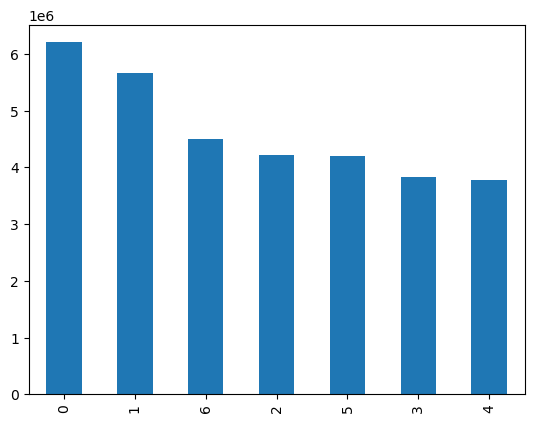

In [5]:
#noncolor bar chart
bar = ords_prods_custm['orders_day_of_week'].value_counts().plot.bar()

#observations are ordered from largest to smallest; Easier to view that (0) Sat has the highest count and (4) the lowest count

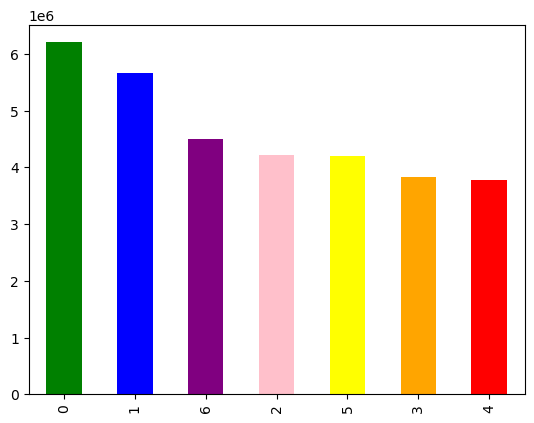

In [6]:
#color bar chart
bar_2 = ords_prods_custm['orders_day_of_week'].value_counts().plot.bar(color =['green', 'blue', 'purple', 'pink', 'yellow', 'orange', 'red'])

In [7]:
#export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# Histogram and Scatterplots

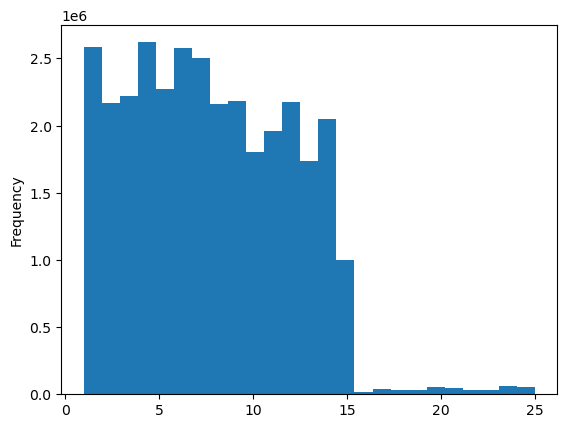

In [8]:
#creating histogram
hist = ords_prods_custm['prices'].plot.hist(bins = 25)

#most products are between 1 and 15, while a few are higher priced at 15 to 25

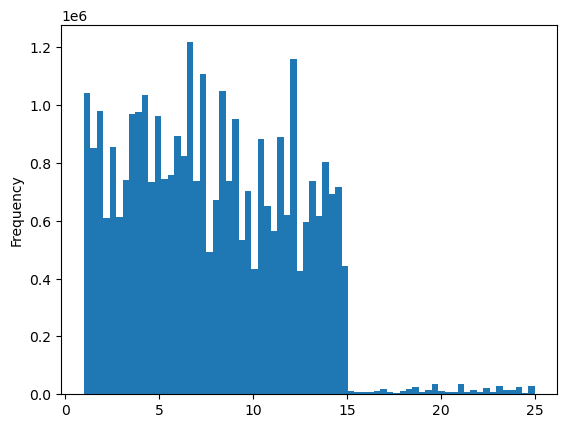

In [9]:
#creating histogram
hist_2 = ords_prods_custm['prices'].plot.hist(bins = 70)

#most products are between 1 and 15, while a few are higher priced at 15 to 25, bins 70

In [10]:
#export histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

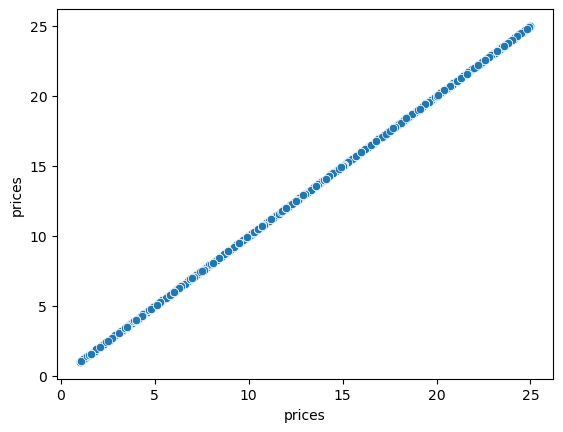

In [11]:
#creating an scatterplot checking for outliers
scatterplot = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_custm)

#observation no outliers

In [12]:
#export scatterplot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_prices.png'))

# Line Chart with Sampling Data

In [13]:
#creating a list holding true/false values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_custm)) <= 0.7

In [14]:
#stores your boolean values
dev

array([False,  True, False, ...,  True,  True,  True])

In [15]:
#store 70% of the sample in the dataframe big
big = ords_prods_custm[dev]

In [16]:
#store 30% of the sample in the dataframe small
small = ords_prods_custm[~dev]

In [17]:
#check subsets
len(ords_prods_custm)
len(big) + len(small)

32404859

In [18]:
#contains only the 'price' and 'orders_day_of_week' columns from your small subset
df_2 = small[['orders_day_of_week', 'prices']]

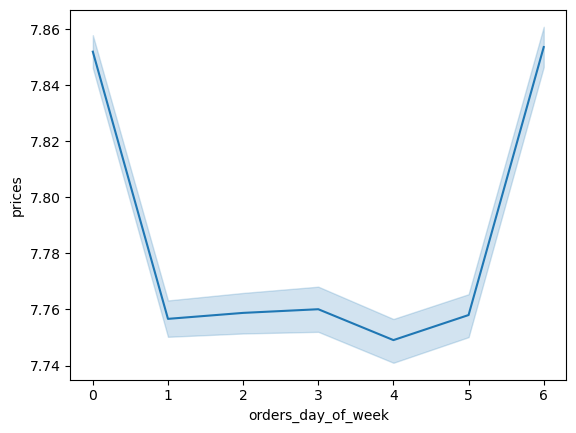

In [19]:
#create your line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [20]:
#export line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_sample_data.png'))

# 3 Histogram 'order_hour_of_day'

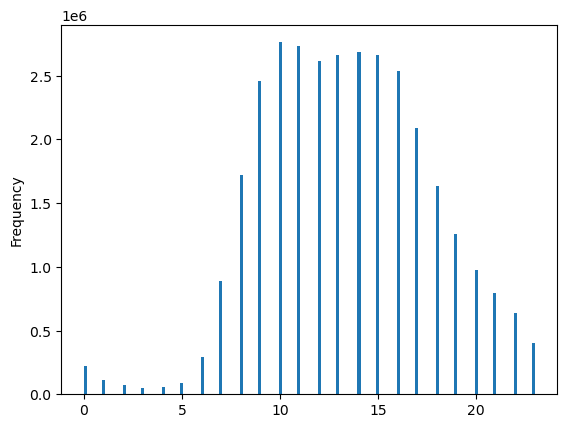

In [21]:
#creating histogram 'order_hour_of_day'
hist_ord_hr_of_day = ords_prods_custm['order_hour_of_day'].plot.hist(bins = 150)

#obersvation hours from 10 to 17 are the busiest hours

# 4 Bar chart Loyalty Customers

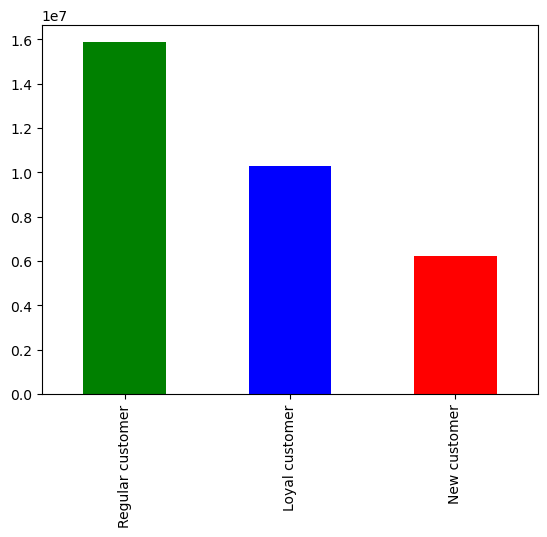

In [38]:
#bar chart of loyalty_flag
bar_loyalty_flag = ords_prods_custm['loyalty_flag'].value_counts().plot.bar(color =['green', 'blue', 'red'])

# 5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [23]:
#contains only the 'price' and 'order_hour_of_the_day' columns from your small subset
df_3 = small[['order_hour_of_day', 'prices']]

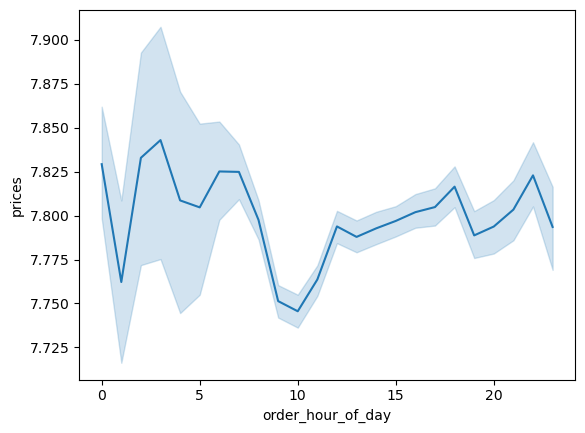

In [24]:
line_chart_ords_of_day_prices = sns.lineplot(data = df_3, x = 'order_hour_of_day' ,y = 'prices')

#obersvation price differ depending the hour of the day, at 10 the prices around 7.750 and hrs between 1 to 5 the price rises; there would be a 95 percent probability that the predicted value would fall within the area of the error bands. 

# 6 determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [25]:
#contains only the 'age' and 'dependents' columns from your small subset
df_4 = small[['age','number_dependants']]

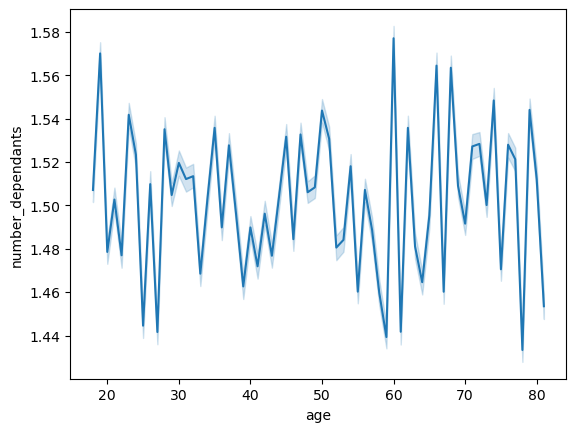

In [26]:
#create your line chart
line_chart_age_dependents = sns.lineplot(data = df_4, x = 'age',y = 'number_dependants')

#obersvation the number of dependants vary thru out the chart, no pattern; peaks on 20 and 60 has high number of dependants; not much of error bands around line

# 7 scatterplot explore whether there’s a connection between age and spending power (income)

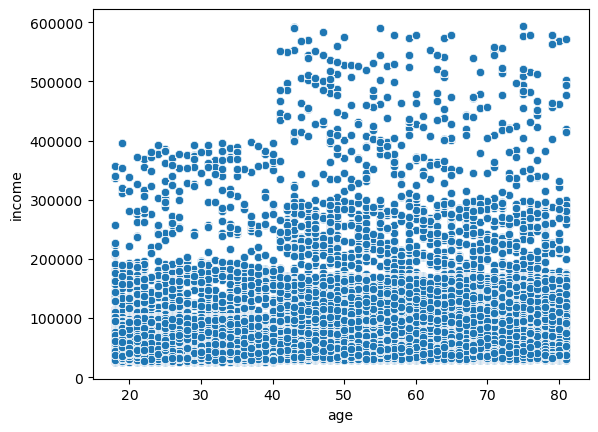

In [27]:
#creating an scatterplot between age and income
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_custm)

#observations there is a positive correlation between age and income, while age goes up so does income

# Export Visualization

In [28]:
#export histogram chart
hist_ord_hr_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_ord_hr_of_day.png'))

In [29]:
#export bar chart
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [30]:
#export line chart
line_chart_ords_of_day_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_chart_ords_of_day_prices.png'))

In [31]:
#export line chart
line_chart_age_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_chart_age_dependents.png'))

In [32]:
#export scatterplot
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))